# Location for the well

## Introduction

The mining company needs to decide where to drill a new well.

Oil samples were provided in three regions: in each 10,000 fields, where the quality of oil and the volume of its reserves were measured. 

* During the exploration of the region, 500 points are explored, from which 200 best ones are selected for development using machine learning.
* The budget for the development of wells in the region is 10 billion dollars.
* At current prices, one barrel of raw materials brings 450 dollars of income. The income from each unit of the product is 450 thousand dollars, since the volume is indicated in thousands of barrels.
* After the risk assessment, it is necessary to leave only those regions in which the probability of losses is less than 2.5%. Among them, the region with the highest average profit is chosen.

**Project objective**

Build a machine learning model that will help determine the region where mining will bring the greatest profit.

**Data description**

* `/datasets/geo_data_0.csv.` – data for region 1;
* `/datasets/geo_data_1.csv.` – data for region 2;
* `/datasets/geo_data_2.csv.` – data for region 3;
* `id` — unique well ID;
* `f0`, `f1`, `f2` — three characteristics of the points;
* `product` — the volume of reserves in the well (thousand barrels).

**Table of content**

1. Data research and preprocession
2. Model training and validation
3. Preparation for profit calculation
4. Calculation of profit and risks 
5. Conclusion

## Data research and preprocession

Uploading all the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LinearRegression

Uploading all three datasets:

In [5]:
geo_data_0 = pd.read_csv('/Users/aasheremeeva/Desktop/All DS Projects/location for the well/geo_data_0.csv')
geo_data_1 = pd.read_csv('/Users/aasheremeeva/Desktop/All DS Projects/location for the well/geo_data_1.csv')
geo_data_2 = pd.read_csv('/Users/aasheremeeva/Desktop/All DS Projects/location for the well/geo_data_2.csv')

### Data type

Getting general information about analyzed data:

In [6]:
def general(data):
    print(data)
    data.head(15)
    print(data[['f0','f1','f2']].hist())

          id        f0        f1        f2     product
0      txEyH  0.705745 -0.497823  1.221170  105.280062
1      2acmU  1.334711 -0.340164  4.365080   73.037750
2      409Wp  1.022732  0.151990  1.419926   85.265647
3      iJLyR -0.032172  0.139033  2.978566  168.620776
4      Xdl7t  1.988431  0.155413  4.751769  154.036647
...      ...       ...       ...       ...         ...
99995  DLsed  0.971957  0.370953  6.075346  110.744026
99996  QKivN  1.392429 -0.382606  1.273912  122.346843
99997  3rnvd  1.029585  0.018787 -1.348308   64.375443
99998  7kl59  0.998163 -0.528582  1.583869   74.040764
99999  1CWhH  1.764754 -0.266417  5.722849  149.633246

[100000 rows x 5 columns]
[[<Axes: title={'center': 'f0'}> <Axes: title={'center': 'f1'}>]
 [<Axes: title={'center': 'f2'}> <Axes: >]]


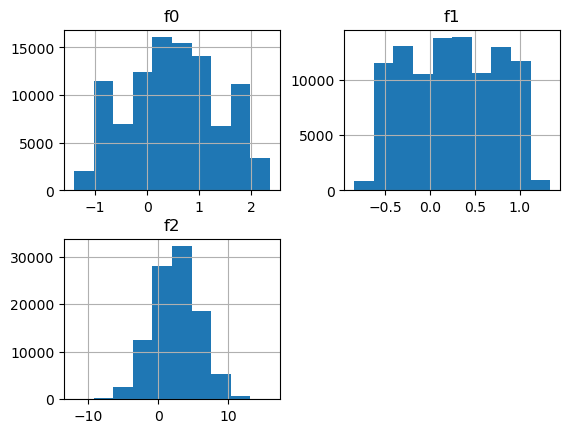

In [7]:
#region_1
general(geo_data_0)

          id         f0         f1        f2     product
0      kBEdx -15.001348  -8.276000 -0.005876    3.179103
1      62mP7  14.272088  -3.475083  0.999183   26.953261
2      vyE1P   6.263187  -5.948386  5.001160  134.766305
3      KcrkZ -13.081196 -11.506057  4.999415  137.945408
4      AHL4O  12.702195  -8.147433  5.004363  134.766305
...      ...        ...        ...       ...         ...
99995  QywKC   9.535637  -6.878139  1.998296   53.906522
99996  ptvty -10.160631 -12.558096  5.005581  137.945408
99997  09gWa  -7.378891  -3.084104  4.998651  137.945408
99998  rqwUm   0.665714  -6.152593  1.000146   30.132364
99999  relB0  -3.426139  -7.794274 -0.003299    3.179103

[100000 rows x 5 columns]
[[<Axes: title={'center': 'f0'}> <Axes: title={'center': 'f1'}>]
 [<Axes: title={'center': 'f2'}> <Axes: >]]


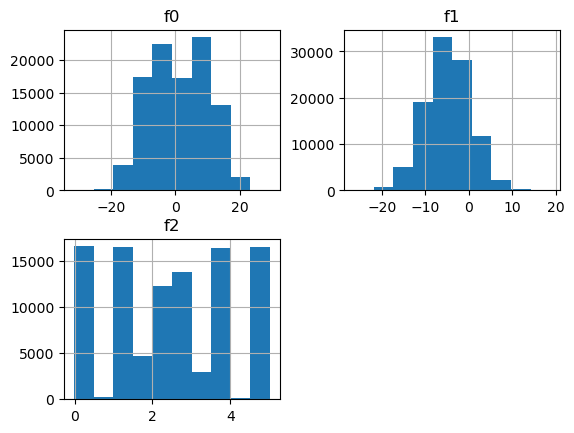

In [8]:
#region_2
general(geo_data_1)

          id        f0        f1        f2     product
0      fwXo0 -1.146987  0.963328 -0.828965   27.758673
1      WJtFt  0.262778  0.269839 -2.530187   56.069697
2      ovLUW  0.194587  0.289035 -5.586433   62.871910
3      q6cA6  2.236060 -0.553760  0.930038  114.572842
4      WPMUX -0.515993  1.716266  5.899011  149.600746
...      ...       ...       ...       ...         ...
99995  4GxBu -1.777037  1.125220  6.263374  172.327046
99996  YKFjq -1.261523 -0.894828  2.524545  138.748846
99997  tKPY3 -1.199934 -2.957637  5.219411  157.080080
99998  nmxp2 -2.419896  2.417221 -5.548444   51.795253
99999  V9kWn -2.551421 -2.025625  6.090891  102.775767

[100000 rows x 5 columns]
[[<Axes: title={'center': 'f0'}> <Axes: title={'center': 'f1'}>]
 [<Axes: title={'center': 'f2'}> <Axes: >]]


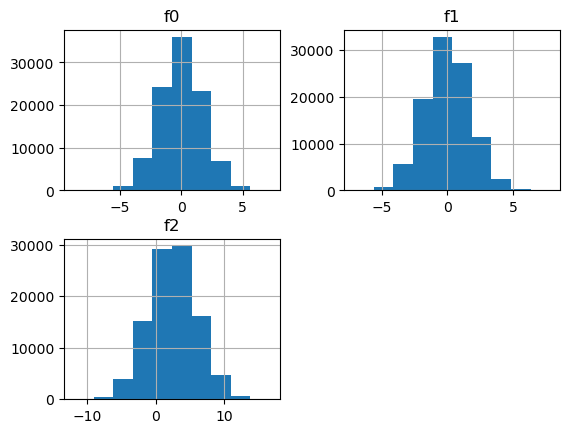

In [9]:
#region_3
general(geo_data_2)

All the variables have relevant types of data.

### Missing data

Checking the data for missing variables:

In [10]:
print('Region 1:')
print(geo_data_0.isna().sum())
print()
print('Region 2:')
print(geo_data_1.isna().sum())
print()
print('Region 3:')
print(geo_data_2.isna().sum())

Region 1:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Region 2:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Region 3:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


### Dublicates

There are no missing values in the data. 
Checking them for dublicates:

In [11]:
print('Region 1:', geo_data_0.duplicated().sum())
print('Region 2:', geo_data_1.duplicated().sum())
print('Region 3:', geo_data_2.duplicated().sum())

Region 1: 0
Region 2: 0
Region 3: 0


There are no dublicates in the data.

Checking the number of zero variables in the dependent variable:

In [12]:
def zeroes_check(data):
    zeroes_total = data[data['product'] == 0]['product'].count()
    return zeroes_total

In [13]:
print('# of zero values in region 1:',zeroes_check(geo_data_0))
print('# of zero values in region 2:',zeroes_check(geo_data_1))
print('# of zero values in region 3:',zeroes_check(geo_data_2))

# of zero values in region 1: 1
# of zero values in region 2: 8235
# of zero values in region 3: 1


In [14]:
print(geo_data_1[geo_data_1['product'] == 0].head(10))
print()
zeroes_share = (zeroes_check(geo_data_1) / len(geo_data_1['product'])).round(2)
print('Share of zero values:', zeroes_share)

        id         f0         f1        f2  product
11   OXyvW  16.320755  -0.562946 -0.001783      0.0
13   igmai   6.695604  -0.749449 -0.007630      0.0
62   Qjy5w  21.418478  -5.134490 -0.002836      0.0
63   G6WCj   6.822701   3.104979 -0.000723      0.0
77   MzQhL   6.750150 -11.893512 -0.001601      0.0
81   gdvra  -3.246882  -7.979657  0.009027      0.0
82   VHp5v  15.363643  -6.456659  0.004302      0.0
83   dm9rM  13.494965  -0.543358  0.001352      0.0
127  6az0U  13.951600  -5.077510 -0.005232      0.0
128  iDXiz   6.820803   5.220184 -0.007179      0.0

Share of zero values: 0.08


There are more than 8k zero values of the product parameter, but their share is 0.08. We will keep this in mind when further working with the data.

### Correlation

Checking the data for any correlation in the raw data:

In [15]:
def cor_check(data):
    correl = data.corr()
    df_plot = sns.heatmap(correl, annot=True)
    
    print(correl)
    print(df_plot)

               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000
Axes(0.125,0.11;0.62x0.77)


/var/folders/s9/2dhk92k53t10g5010dcth9r80000gn/T/ipykernel_90450/1169630245.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl = data.corr()


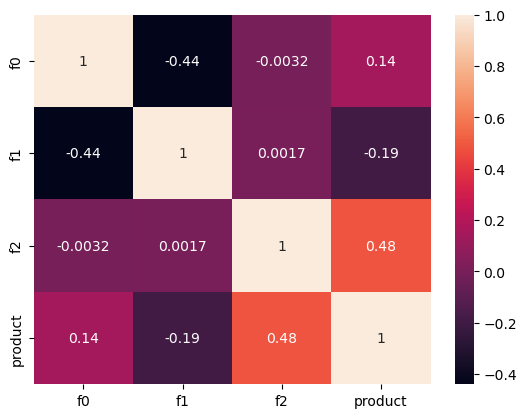

In [16]:
cor_check(geo_data_0)

               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000
Axes(0.125,0.11;0.62x0.77)


/var/folders/s9/2dhk92k53t10g5010dcth9r80000gn/T/ipykernel_90450/1169630245.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl = data.corr()


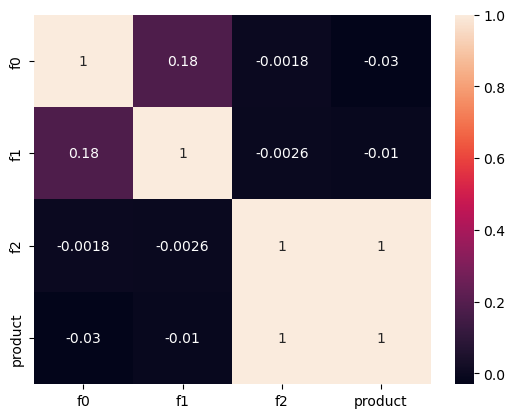

In [17]:
cor_check(geo_data_1)

               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000
Axes(0.125,0.11;0.62x0.77)


/var/folders/s9/2dhk92k53t10g5010dcth9r80000gn/T/ipykernel_90450/1169630245.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl = data.corr()


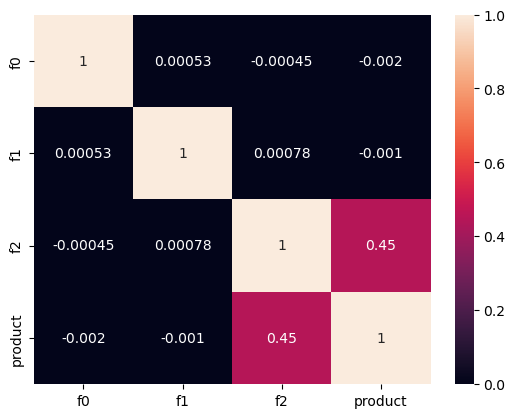

In [18]:
cor_check(geo_data_2)

There are no any significant correlation among dependent and indepentent variables.

### Conclusion

The data in all three datasets are checked for relevant data types, there are no omissions and obvious duplicates in the data, we can safely start building models.

## Model training and validation

### Samples preparation

Dividing each dataset into features and predicted parameters before training the model:

In [19]:
#region_1
X_0 = geo_data_0.drop(['product'],axis=1)
y_0 = geo_data_0['product']

#region_2
X_1 = geo_data_1.drop(['product'],axis=1)
y_1 = geo_data_1['product']

#region_3
X_2 = geo_data_2.drop(['product'],axis=1)
y_2 = geo_data_2['product']

Splitting the data into training and validation samples in the proportion of 75 vs 25.

In [20]:
#region_1
X_0_train, X_0_valid, y_0_train, y_0_valid = train_test_split(X_0, y_0, test_size=0.25, shuffle = True, random_state = 42)

print(X_0_train.shape)
print(X_0_valid.shape)

print(y_0_train.shape)
print(y_0_valid.shape)

print()
#region_2
X_1_train, X_1_valid, y_1_train, y_1_valid = train_test_split(X_1, y_1, test_size=0.25, shuffle = True, random_state = 42)

print(X_1_train.shape)
print(X_1_valid.shape)

print(y_1_train.shape)
print(y_1_valid.shape)

print()
#region_3
X_2_train, X_2_valid, y_2_train, y_2_valid = train_test_split(X_2, y_2, test_size=0.25, shuffle = True, random_state = 42)

print(X_1_train.shape)
print(X_1_valid.shape)

print(y_1_train.shape)
print(y_1_valid.shape)

(75000, 4)
(25000, 4)
(75000,)
(25000,)

(75000, 4)
(25000, 4)
(75000,)
(25000,)

(75000, 4)
(25000, 4)
(75000,)
(25000,)


### Variables standartization

In [26]:
# def standartization(data_train, data_valid):
#     parameters=['f0', 'f1', 'f2']
#     scaler = StandardScaler()
#     scaler.fit(data_train[parameters])
    
#     data_train[parameters]=scaler.transform(data_train[parameters])
#     data_train_scaled=pd.DataFrame(data_train[parameters], columns = parameters, index = data_train.index)
    
#     data_valid[parameters]=scaler.transform(data_valid[parameters])
#     data_valid_scaled = pd.DataFrame(data_valid[parameters], columns = parameters, index = data_valid.index)

#     print(data_train_scaled)
#     print(data_valid_scaled)
    
#     data_train_scaled
#     data_valid_scaled

In [31]:
#region_1
parameters=['f0', 'f1', 'f2']
scaler = StandardScaler()
scaler.fit(X_0_train[parameters])

X_0_train[parameters]=scaler.transform(X_0_train[parameters])
X_0_train_scaled = pd.DataFrame(X_0_train[parameters], columns = parameters, index = X_0_train.index)

X_0_valid[parameters]=scaler.transform(X_0_valid[parameters])
X_0_valid_scaled = pd.DataFrame(X_0_valid[parameters], columns = parameters, index = X_0_valid.index)

print(X_0_train_scaled)
print(X_0_valid_scaled)

             f0        f1        f2
98980  1.274786 -0.799739 -0.396677
69824 -1.600689  0.234678 -2.169283
9928  -0.323791  1.436297  1.495425
75599  0.439038  0.830679  0.185881
95621 -1.652805  0.761012  0.111734
...         ...       ...       ...
6265   1.291452 -0.712129  0.135573
54886  1.355542 -0.882161 -1.134411
76820  0.549229 -1.591632  0.119090
860    0.175176 -1.459344  1.429524
15795  1.029803 -1.420625 -0.149459

[75000 rows x 3 columns]
             f0        f1        f2
75721  0.113830 -1.605391 -0.119836
80184  0.274030 -1.417818 -1.187407
19864  1.057896 -1.560307  0.371855
76699  1.238466 -0.971658  0.090665
92991  0.480343 -0.450600  0.027088
...         ...       ...       ...
21271  0.291949 -1.515226  0.030842
34014 -0.644370  0.528145 -0.552783
81355  0.107509 -1.342572 -0.934248
65720 -0.345986  0.403163 -0.311768
11627 -0.856089  1.513279  0.667150

[25000 rows x 3 columns]


In [32]:
#region_2
parameters_1=['f0', 'f1', 'f2']
scaler = StandardScaler()
scaler.fit(X_1_train[parameters_1])

X_1_train[parameters_1]=scaler.transform(X_1_train[parameters_1])
X_1_train_scaled = pd.DataFrame(X_1_train[parameters_1], columns = parameters_1, index = X_1_train.index)

X_1_valid[parameters_1]=scaler.transform(X_1_valid[parameters_1])
X_1_valid_scaled = pd.DataFrame(X_1_valid[parameters_1], columns = parameters_1, index = X_1_valid.index)

print(X_1_train_scaled)
print(X_1_valid_scaled)

             f0        f1        f2
98980  0.911229  0.063780 -0.291331
69824  1.640885  1.320793  1.463778
9928  -0.303818  0.859595  0.297952
75599  1.250304 -0.332629 -0.290244
95621 -0.678630 -0.629111 -0.877242
...         ...       ...       ...
6265  -1.140795 -1.002097 -0.879911
54886  0.152004  0.240185  0.885308
76820  1.148086  1.645749 -0.879260
860   -0.372035 -0.273312 -1.460326
15795  0.950361  0.148686  1.464975

[75000 rows x 3 columns]
             f0        f1        f2
75721  0.552191  0.955717 -1.463414
80184  1.710676  1.469288 -0.295155
19864  0.660832  1.089057  1.464310
76699 -0.152665  0.864785  0.882843
92991  1.363467 -0.733052 -1.463970
...         ...       ...       ...
21271  0.782380  0.776593  0.884183
34014  1.726224 -0.651563 -0.284975
81355  1.511249 -0.161641 -0.875658
65720 -0.279964 -0.128495  0.883991
11627  0.810205  0.395430  1.474231

[25000 rows x 3 columns]


In [33]:
#region_3
parameters_2 = ['f0', 'f1', 'f2']
scaler = StandardScaler()
scaler.fit(X_2_train[parameters_2])

X_2_train[parameters_2]=scaler.transform(X_2_train[parameters_2])
X_2_train_scaled = pd.DataFrame(X_2_train[parameters_2], columns = parameters_2, index = X_2_train.index)

X_2_valid[parameters_2]=scaler.transform(X_2_valid[parameters_2])
X_2_valid_scaled = pd.DataFrame(X_2_valid[parameters_2], columns = parameters_2, index = X_2_valid.index)

print(X_2_train_scaled)
print(X_2_valid_scaled)

             f0        f1        f2
98980 -0.343864 -1.338311  0.817572
69824 -0.400431  0.993613 -1.102974
9928   1.004849 -0.923485 -0.576264
75599 -0.784031  0.571573  0.914886
95621  0.619771  0.681588 -0.429467
...         ...       ...       ...
6265  -1.065848  0.001242 -0.453401
54886  0.044436  0.624649  0.362074
76820 -1.321785  0.869697 -1.022513
860   -0.836921 -1.246740  0.239293
15795  0.796969  1.396468  0.998500

[75000 rows x 3 columns]
             f0        f1        f2
75721  1.218275 -0.966868  0.175298
80184  0.423146  0.434841  0.336007
19864 -1.453162  0.490760 -2.136247
76699 -1.177130 -0.876338  0.739322
92991  1.583978  0.828733 -1.114918
...         ...       ...       ...
21271 -0.886762  0.213996  0.384785
34014  0.796624  0.677797 -0.069224
81355  1.675453  0.487626 -1.530632
65720  0.542924 -0.819551 -0.556756
11627  0.585518 -0.920905 -0.416771

[25000 rows x 3 columns]


<div class="alert alert-info">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
Стоит оформлять код в виде функций. Весь проект по сути - проделывание одних и тех же операций с разными датасетами. Сейчас их 3, а в реальном проекте может быть 50 и вообще сколько угодно. Оформление повторяющихся кусков кода в виде функции в принципе является следствием важного принципа разработки: DRY (don't repeat yourself). И делает код намного более легко поддерживаемым: если в обработке данных что-то поменялось, то это надо в коде поменять один раз, а не столько, сколько датасетов.<br>

Аналогично с логикой почему повторяющийся код стоит оформлять в функции, константные значения, которые повторяются в коде в нескольких местах, такие как random state или test size, стоит заносить в переменные. Представь ты сделал работу по анализу 50 регионов, а потом заказчик попросил поменять размер теста с 0.25 на 0.3, решив, что оценка на 0.25 недостаточно точная. Менять число в 50 местах кода - куда хуже, чем в начале кода поменять TEST_SIZE = 0.25 на TEST_SIZE = 0.3. Код становится намного легче поддерживать, говоря профессиональным языком.

### Training the model

Linear model:

In [34]:
#region_1
model_0 = LinearRegression()
model_0.fit(X_0_train_scaled, y_0_train)
predicted_valid_0 = model_0.predict(X_0_valid_scaled)

MSE_0 = mean_squared_error(y_0_valid, predicted_valid_0)
 
RMSE_0 = math.sqrt(MSE_0)

print("Root Mean Square Error:")
print(RMSE_0)
print()
print("Average stock of predicted raw materials in region 1:")
print(predicted_valid_0.mean().round(2))

Root Mean Square Error:
37.75660035026169

Average stock of predicted raw materials in region 1:
92.4


In [35]:
#region_2
model_1 = LinearRegression()
model_1.fit(X_1_train_scaled, y_1_train)
predicted_valid_1 = model_1.predict(X_1_valid_scaled)

MSE_1 = mean_squared_error(y_1_valid, predicted_valid_1)
 
RMSE_1 = math.sqrt(MSE_1)

print("Root Mean Square Error:")
print(RMSE_1)
print()
print("Average stock of predicted raw materials in region 2:")
print(predicted_valid_1.mean().round(2))

Root Mean Square Error:
0.8902801001028847

Average stock of predicted raw materials in region 2:
68.71


In [36]:
#region_3
model_2 = LinearRegression()
model_2.fit(X_2_train_scaled, y_2_train)
predicted_valid_2 = model_2.predict(X_2_valid_scaled)

MSE_2 = mean_squared_error(y_2_valid, predicted_valid_2)
 
RMSE_2 = math.sqrt(MSE_2)

print("Root Mean Square Error:")
print(RMSE_2)
print()
print("Average stock of predicted raw materials in region 3:")
print(predicted_valid_2.mean().round(2))

Root Mean Square Error:
40.14587231134218

Average stock of predicted raw materials in region 3:
94.77


### Conclusion

As a result of constructing three linear models, the smallest RMSE is observed for the second region (0.89). The second and third places were occupied by the first and third regions, respectively. 
At the same time, the smallest average stock of predicted raw materials is observed for 2 regions, which casts doubt on its leadership. Final decisions will be made based on subsequent calculations of profits and risks using the Bootstrap method.

## Calculation of profit and risks

### Variables and break-even point

Creating the necessary constant variables based on the available inputs in the condition:

In [37]:
budget = 10e9
income_per_product = 450e3

To calculate the break-even point, it is necessary to divide the existing budget by income per unit of product.

In [38]:
breakeven_point = budget / income_per_product
print(round(breakeven_point,2))

22222.22


22222.22 thousand barrels are needed for the break-even development of a new well.

In [39]:
print(round(breakeven_point/200,2))

111.11


At the same time, the average volume of oil per 1 well in the break-even state is 111.11.

Estimation of the average volume of raw material reserves per 1 well in each region and comparing it with the break-even point:

In [40]:
average_product_0 = geo_data_0['product'].mean()
average_product_1 = geo_data_1['product'].mean()
average_product_2 = geo_data_2['product'].mean()

print("Average volume of raw materials stocks in region 1:",average_product_0.round(2))
print("Average volume of raw materials stocks in region 2:",average_product_1.round(2))
print("Average volume of raw materials stocks in region 3:",average_product_2.round(2))

Average volume of raw materials stocks in region 1: 92.5
Average volume of raw materials stocks in region 2: 68.83
Average volume of raw materials stocks in region 3: 95.0


As a result, the average volume of reserves in all regions is lower than at the break-even point.

### Combining data

For further calculations, separate variables are needed with real and predicted values in separate variables for each region:

In [41]:
#region_1
data_0 = {'true_product' : y_0_valid,
            'predicted_product' : predicted_valid_0}
data_0 = pd.DataFrame(data_0, columns = ['true_product', 'predicted_product'])
print(data_0)

#region_2
data_1 = {'true_product' : y_1_valid,
            'predicted_product' : predicted_valid_1}
data_1 = pd.DataFrame(data_1, columns = ['true_product', 'predicted_product'])
print(data_1)

#region_3
data_2= {'true_product' : y_2_valid,
            'predicted_product' : predicted_valid_2}
data_2 = pd.DataFrame(data_2, columns = ['true_product', 'predicted_product'])
print(data_2)

       true_product  predicted_product
75721    122.073350         101.901017
80184     48.738540          78.217774
19864    131.338088         115.266901
76699     88.327757         105.618618
92991     36.959266          97.980185
...             ...                ...
21271    148.821520         105.076959
34014    123.454003          74.768176
81355     91.945213          82.544397
65720    149.295563          81.826689
11627     57.244039          93.121062

[25000 rows x 2 columns]
       true_product  predicted_product
75721      0.000000           0.844738
80184     53.906522          52.921612
19864    134.766305         135.110385
76699    107.813044         109.494863
92991      0.000000          -0.047292
...             ...                ...
21271    107.813044         108.351600
34014     53.906522          53.604049
81355     26.953261          26.708734
65720    110.992147         109.823087
11627    134.766305         135.448780

[25000 rows x 2 columns]
       true_

### Profit function

Building a function for calculating profit:

In [42]:
def profit_1(data):
    data_sorted = data.sort_values(by=['predicted_product'],ascending=False)
    top_target_walls = data_sorted['true_product'][:200]
    profit = top_target_walls.sum()*income_per_product - budget
    return profit

Testing the functionality of the function: total profit for each region calculation:

In [43]:
#region_1
print('Суммарная прибыль региона 1:')
print(profit_1(data_0))
print()
#region_2
print('Суммарная прибыль региона 2:')
print(profit_1(data_1))
print()
#region_3
print('Суммарная прибыль региона 3:')
print(profit_1(data_2))

Суммарная прибыль региона 1:
3359141114.462179

Суммарная прибыль региона 2:
2415086696.681511

Суммарная прибыль региона 3:
2598571759.374111


### Conclusion

The break-even point was calculated, a separate function for calculating profit was created.

At this stage, the break-even point is still higher than the stock of raw materials in each of the wells.

## Profit & risks calculation

In [44]:
state = np.random.RandomState(42)

def bootstrap_1(data):
    profit_final = []
    for i in range(1000):
        data_sample = data.sample(n=500, replace=True, random_state = state)
        profit_f = profit_1(data_sample)
        profit_final.append(profit_f)
    
    profit_final = pd.Series(profit_final)
    
    lower = profit_final.quantile(0.025)
    upper = profit_final.quantile(0.975)
    
    profit_average = profit_final.mean()
    
    risk = profit_final[profit_final < 0].count() / profit_final.count()
    
    print('Average profit by region:', profit_average.round(2))
    print(f'95% confidence interval: [{(lower.round(2))}, {(upper.round(2))}]')
    print('Risk percentage:{:.2%}'.format(risk))
    
    print(profit_final.hist())
   

Average profit by region: 399575478.05
95% confidence interval: [-110467895.33, 897460327.72]
Risk percentage:6.00%
Axes(0.125,0.11;0.775x0.77)


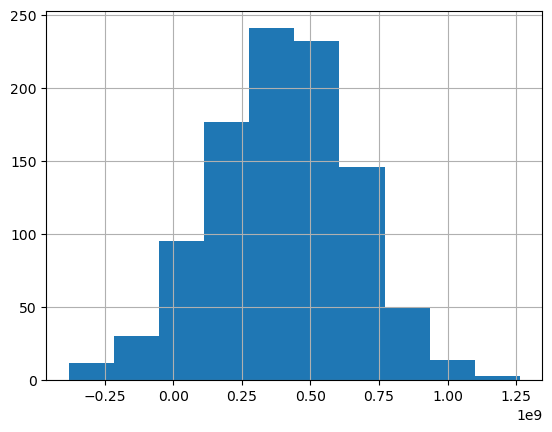

In [45]:
#region_1
bootstrap_1(data_0)

Average profit by region: 452576594.29
95% confidence interval: [52309409.8, 830146313.26]
Risk percentage:0.90%
Axes(0.125,0.11;0.775x0.77)


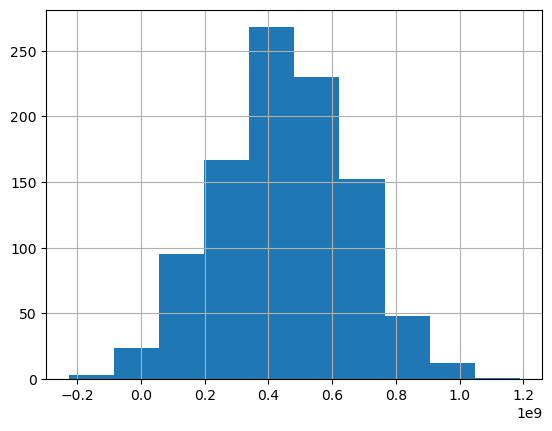

In [46]:
#region_2
bootstrap_1(data_1)

Average profit by region: 378705903.66
95% confidence interval: [-127779434.99, 907923483.22]
Risk percentage:7.50%
Axes(0.125,0.11;0.775x0.77)


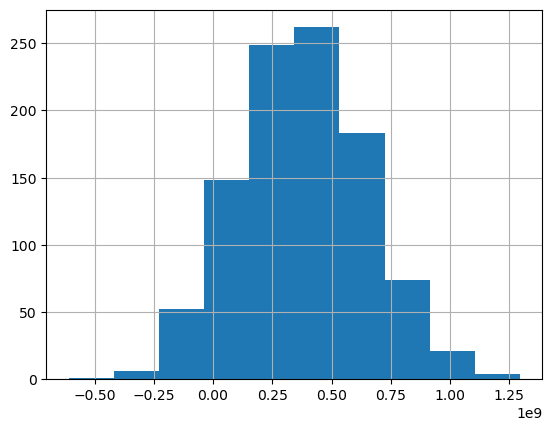

In [47]:
#region_3
bootstrap_1(data_2)

## Conclusion

As a result of the conducted research, the following steps were performed: 

- Data study and its preparation for further model building
- Three linear models were built for each region and RMSE calculated.
- A function has been written to calculate profits in each region. 
- The bootstrap method calculated the average profit, confidence interval and percentage of risk. 

Based on the results obtained, we see that as a result, the lowest percentage of risk and the highest average profit are observed for the second region, which indicates the need to abandon consideration of the first and third regions at this stage.